## Data Preprocessing

### import library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import defaultdict
import datetime

### Read data


In [2]:
df = pd.read_csv('../CrawlData/in4_movie_test3.csv')

In [3]:
df.head(2)

,Unnamed: 0,Synonyms,Genre,English,Aired,Licensors,Demographics,Studios,Theme,Ranked,...,French,Type,Producers,Genres,Popularity,Duration,Rating,Premiered,German,Status
0,0,[' Frieren at the Funeral '],"['AdventureAdventure, DramaDrama, ...","["" Frieren: Beyond Journey's End ""]","[' Sep 29, 2023 to Mar 22, 2024 ']",[' 葬送のフリーレン '],[],['Madhouse '],[],"["" #122 based on the top anime page. Pleas...",...,[],['TV'],"['Aniplex, Dentsu, Shogakukan-Shue...","['AdventureAdventure, DramaDrama, ...",[' #277'],[' 24 min. per ep. '],[' PG-13 - Teens 13 or older '],['Fall 2023'],[],[' Finished Airing ']
1,1,[' Hagane no Renkinjutsushi: Fullmetal Alchemi...,"['ActionAction, AdventureAdventure, ...",[' Fullmetal Alchemist: Brotherhood '],"[' Apr 5, 2009 to Jul 4, 2010 ']",[' 鋼の錬金術師 FULLMETAL ALCHEMIST '],[],['Bones '],['MilitaryMilitary '],"["" #222 based on the top anime page. Pleas...",...,[' Fullmetal Alchemist Brotherhood '],['TV'],"['Aniplex, Square Enix, Mainichi B...","['ActionAction, AdventureAdventure, ...",[' #3'],[' 24 min. per ep. '],[' R - 17+ (violence & profanity) '],['Spring 2009'],[],[' Finished Airing ']


### Hiện tại các trường đang ở dạng list hết nên cần phải convert hết về string

In [4]:
#! các trường mà chỉ có [] thì phải replace bằng từ nan. Còn lại thì convert hết ra str. 
df = df.drop(columns=['Unnamed: 0'])


In [5]:
#! convert toàn bộ cột về dạng str
for col in df.columns:
    df[col] = df[col].str[2:-2]

### Lúc này nếu bấm info() thì sẽ không thấy string rỗng -> replace toàn bộ string rỗng với từ nan

In [6]:
#! fill empty string with nan
df = df.replace('',np.NAN)

### chỉ lấy những phim chiếu từ năm 2000 - 2024

In [7]:
#! drop row that in Aired below 2000:
#! find row that Aired below 2000:
remove_row_index = []
for i in range(len(df['Aired'])):
    if df['Aired'][i][-6] != '2':
        remove_row_index.append(i)

In [8]:
df =df.drop(remove_row_index)

In [9]:
#! xoa nhung cot khong dung
df = df.drop(columns=['Themes','Genres','German','French','Demographics']).reset_index(drop=True)


### loại bỏ hết khoảng trắng trong string

In [10]:
#! loại hết khoảng trắng trong các giá trị
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Synonyms     2899 non-null   object
 1   Genre        4106 non-null   object
 2   English      3121 non-null   object
 3   Aired        4185 non-null   object
 4   Licensors    4183 non-null   object
 5   Studios      4185 non-null   object
 6   Theme        3266 non-null   object
 7   Ranked       4185 non-null   object
 8   Demographic  1732 non-null   object
 9   Source       4185 non-null   object
 10  Broadcast    2068 non-null   object
 11  Members      4185 non-null   object
 12  Favorites    4185 non-null   object
 13  Episodes     4185 non-null   object
 14  Type         4185 non-null   object
 15  Producers    4185 non-null   object
 16  Popularity   4185 non-null   object
 17  Duration     4185 non-null   object
 18  Rating       4185 non-null   object
 19  Premiered    2015 non-null 

In [12]:
df.head(3)

,Synonyms,Genre,English,Aired,Licensors,Studios,Theme,Ranked,Demographic,Source,...,Members,Favorites,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status
0,Frieren at the Funeral,"AdventureAdventure, DramaDrama, ...",Frieren: Beyond Journey's End,"Sep 29, 2023 to Mar 22, 2024",葬送のフリーレン,Madhouse,NaN,#122 based on the top anime page. Please no...,ShounenShounen,Manga,...,"725,256","40,537",28,TV,"Aniplex, Dentsu, Shogakukan-Shueis...",#277,24 min. per ep.,PG-13 - Teens 13 or older,Fall 2023,Finished Airing
1,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...","ActionAction, AdventureAdventure, ...",Fullmetal Alchemist: Brotherhood,"Apr 5, 2009 to Jul 4, 2010",鋼の錬金術師 FULLMETAL ALCHEMIST,Bones,MilitaryMilitary,#222 based on the top anime page. Please no...,ShounenShounen,Manga,...,"3,346,066","226,011",64,TV,"Aniplex, Square Enix, Mainichi Bro...",#3,24 min. per ep.,R - 17+ (violence & profanity),Spring 2009,Finished Airing
2,NaN,"DramaDrama, Sci-FiSci-Fi, Susp...",Steins;Gate,"Apr 6, 2011 to Sep 14, 2011",STEINS;GATE,White Fox,"PsychologicalPsychological, Time Trave...",#322 based on the top anime page. Please no...,NaN,Visual novel,...,"2,564,359","189,650",24,TV,"Frontier Works, Media Factory, Kad...",#13,24 min. per ep.,PG-13 - Teens 13 or older,Spring 2011,Finished Airing


### fill nan đối với các string trong Demographic. không được drop vì trường này là quan trọng

In [13]:
#! trong toàn bộ ds thì có bao nhiêu là cho nam, cho nữ, nam ít tuổi, nam lớn tuổi, nữ ít, nữ to...
df['Demographic'] = df['Demographic'].fillna('All')


### Kiểm tra lại lần cuối các trường data

In [14]:
df.describe()

,Synonyms,Genre,English,Aired,Licensors,Studios,Theme,Ranked,Demographic,Source,...,Members,Favorites,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status
count,2899,4106,3121,4185,4183,4185,3266,4185,4185,4185,...,4185,4185,4185,4185,4185,4185,4185,4185,2015,4185
unique,2866,510,3097,3476,3963,494,539,4151,7,17,...,4130,1654,125,6,2118,4133,210,6,107,2
top,"Cloudy Laugh Gaiden, Laughing Under the Clouds...",ComedyComedy,Ling Cage,"Apr 21, 2007",僕のヒーローアカデミア,Toei Animation,SchoolSchool,#183922 based on the top anime page. Please...,All,Manga,...,"7,349",3,1,TV,"None found, add some",#1944,24 min. per ep.,PG-13 - Teens 13 or older,Fall 2023,Finished Airing
freq,3,296,3,5,6,181,245,2,2453,1807,...,3,59,1369,2015,912,2,980,2751,37,4184


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Synonyms     2899 non-null   object
 1   Genre        4106 non-null   object
 2   English      3121 non-null   object
 3   Aired        4185 non-null   object
 4   Licensors    4183 non-null   object
 5   Studios      4185 non-null   object
 6   Theme        3266 non-null   object
 7   Ranked       4185 non-null   object
 8   Demographic  4185 non-null   object
 9   Source       4185 non-null   object
 10  Broadcast    2068 non-null   object
 11  Members      4185 non-null   object
 12  Favorites    4185 non-null   object
 13  Episodes     4185 non-null   object
 14  Type         4185 non-null   object
 15  Producers    4185 non-null   object
 16  Popularity   4185 non-null   object
 17  Duration     4185 non-null   object
 18  Rating       4185 non-null   object
 19  Premiered    2015 non-null 

In [30]:
df['Aired'][5]

'Jan 8, 2021'

## data analysis

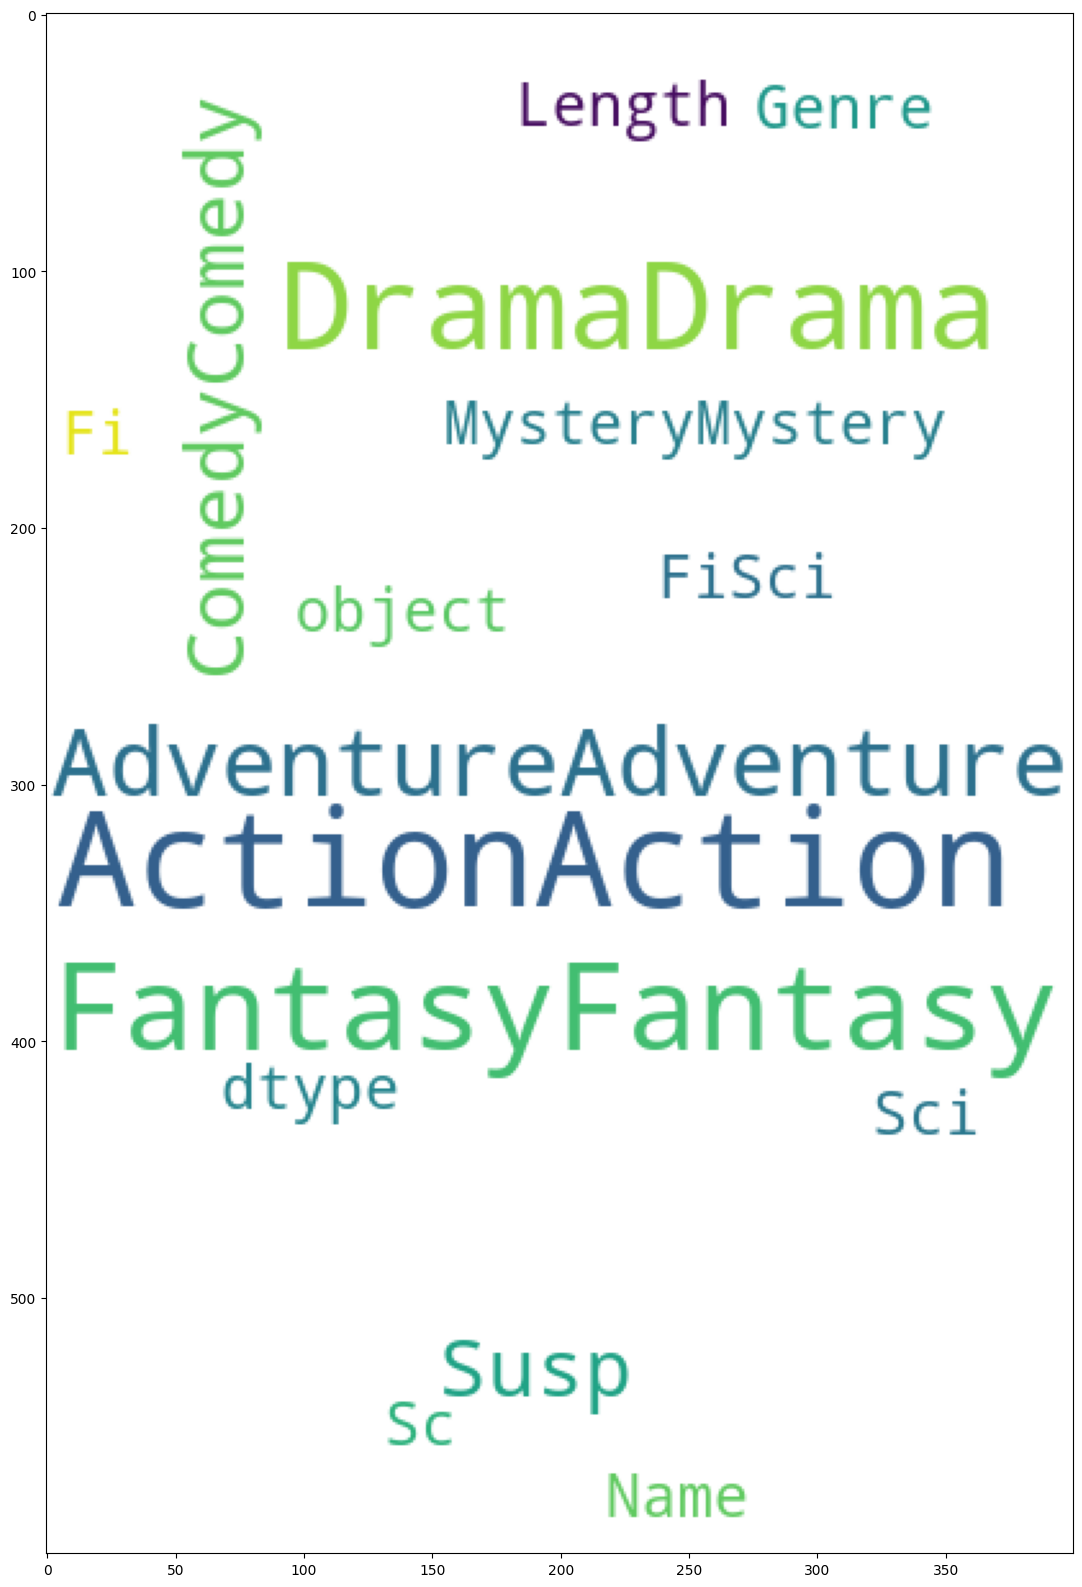

In [16]:
#! tìm xem các từ chủ yếu được sử dụng trong Genre sử dụng word cloud
from wordcloud import STOPWORDS,WordCloud

wc = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    height=600,
    width=400
)
wc.generate(str(df['Genre']))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wc)

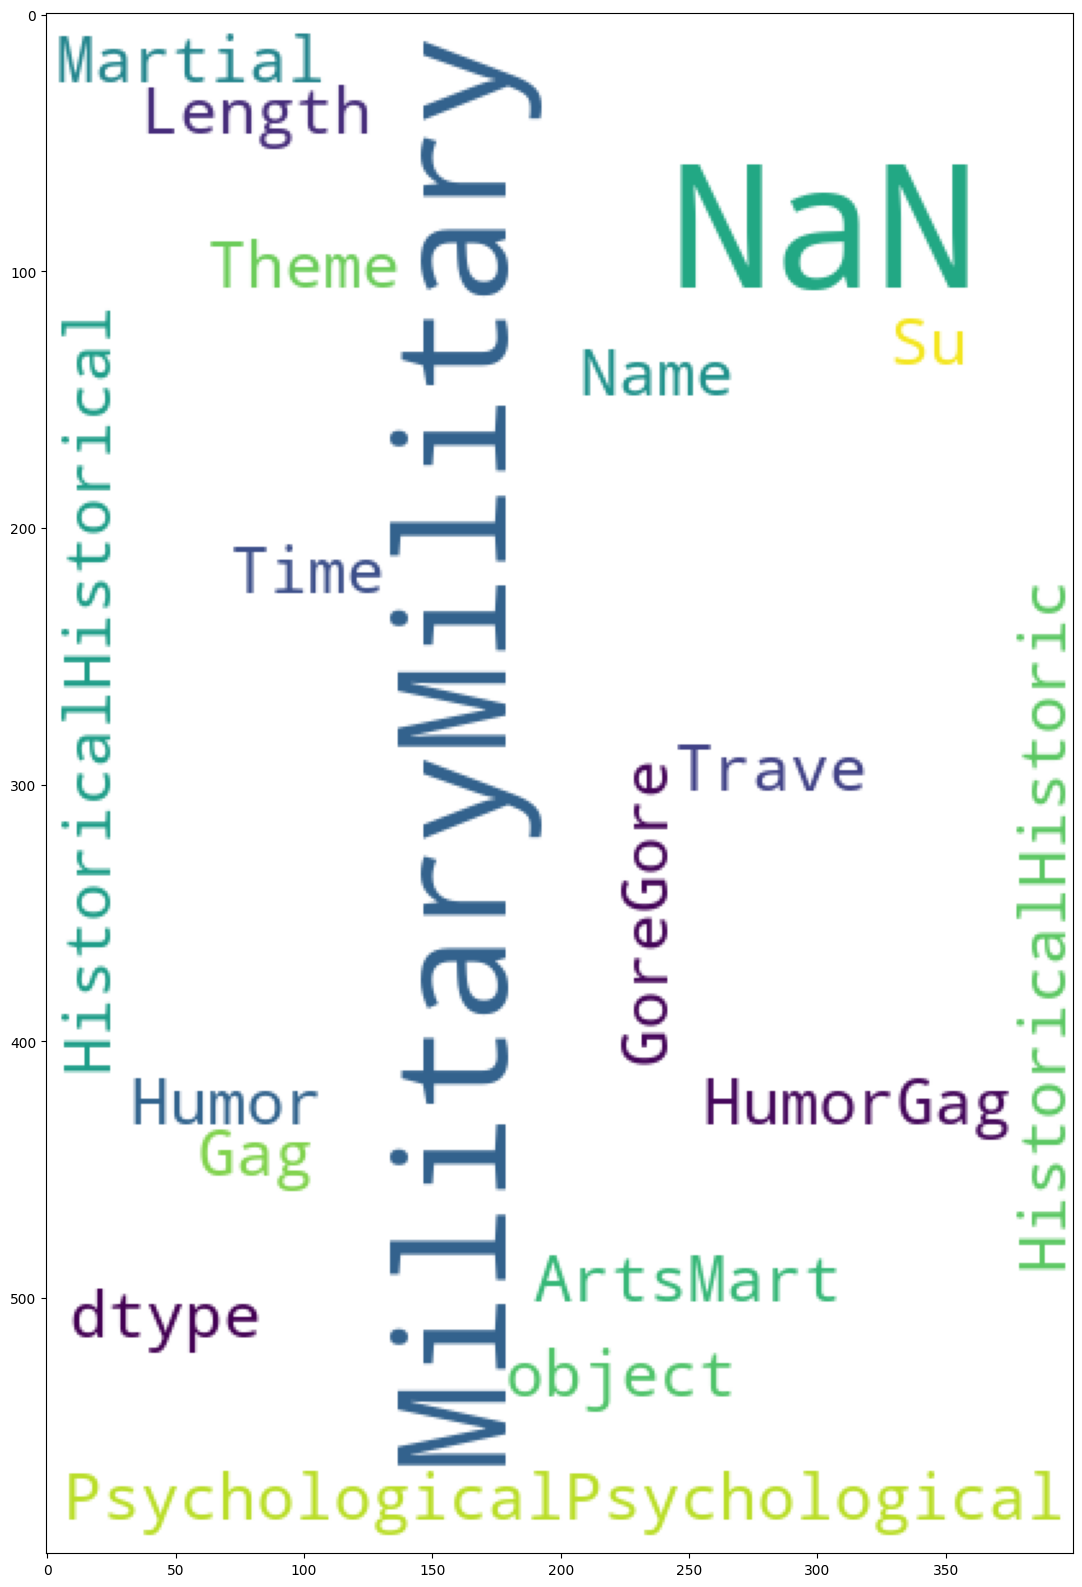

In [17]:
from wordcloud import STOPWORDS,WordCloud

wc = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    height=600,
    width=400
)
wc.generate(str(df['Theme']))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wc)

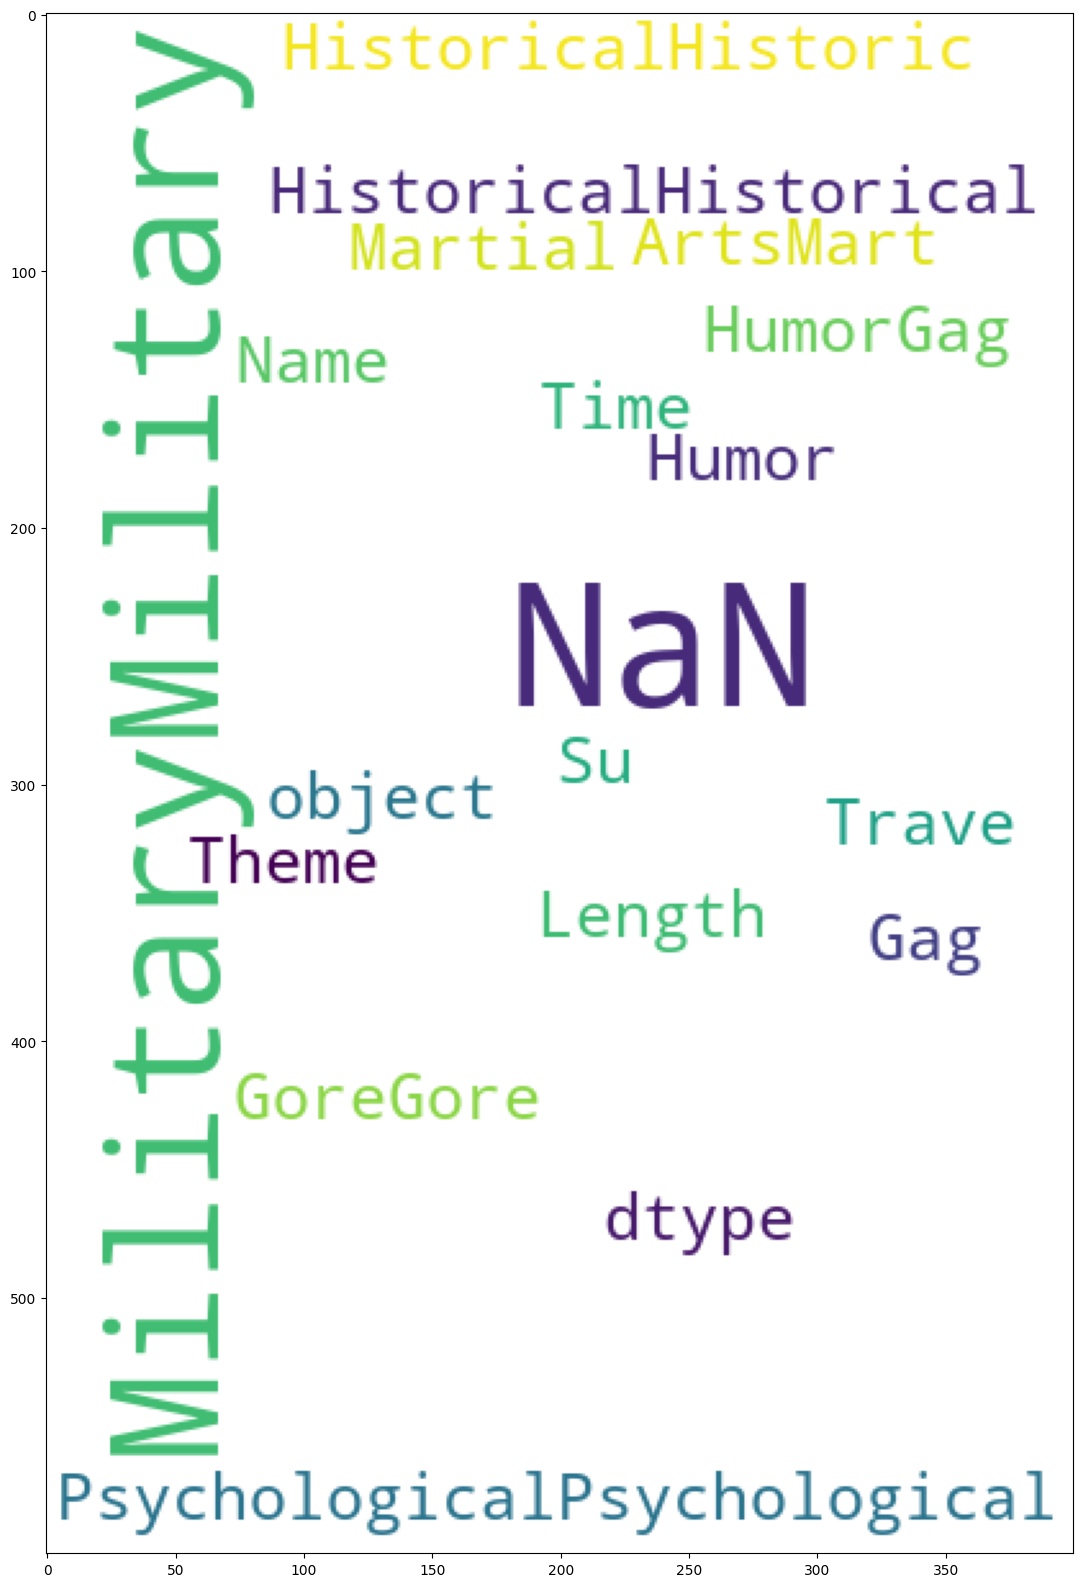

In [18]:
from wordcloud import STOPWORDS,WordCloud

wc = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    height=600,
    width=400
)
wc.generate(str(df['Theme']))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wc)

In [19]:
#! đếm xem xem có bao nhiêu phim là tên giống (tức là lúc này nó sẽ sinh ra nhiều phần)
#! cái này làm sau!

In [20]:
#! kiểm tra số phim được onair trong các năm

on_air_film_year = defaultdict(int)
y = []
for i in range(25):
    temp = str(i)
    if len(temp) == 1:
        temp = '0' + temp
    y.append(temp)

for year in y:
    for value in df['Aired']:
        if ('20' + year)  in value:
            on_air_film_year['20' + year] += 1



In [21]:
#! khởi tạo random color plot cho đẹp trai
import random
random_color = ["#"+''.join([random.choice('0123456789abcdef') for j in range(6)]) for i in range(120)]

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

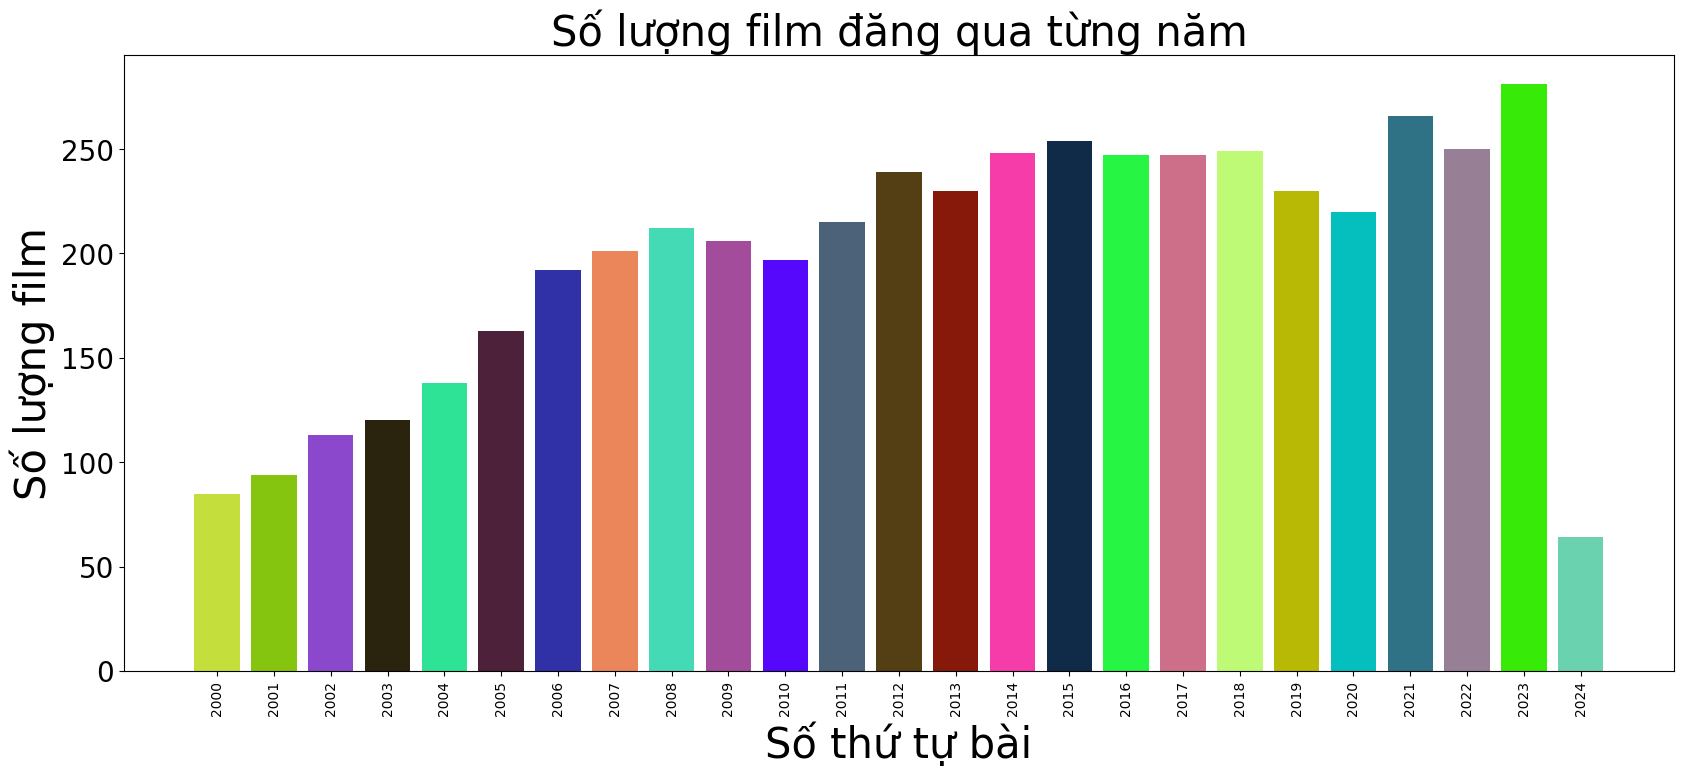

In [22]:
#! kể từ năm 2000 tới 2024, số phim đã được phát hành trên page?
plt.figure(figsize=(20,8))
plt.title("Số lượng film đăng qua từng năm",size=30)
plt.xlabel("Số thứ tự bài",size=30)
plt.ylabel("Số lượng film",size=30)
keys = on_air_film_year.keys()
values = on_air_film_year.values()
plt.bar(keys,values,color=random_color)
plt.xticks(rotation=90,size=10)
plt.yticks(size=20)

In [23]:
#! tự dưng năm 2023 tăng vọt lên. Tại sao? 

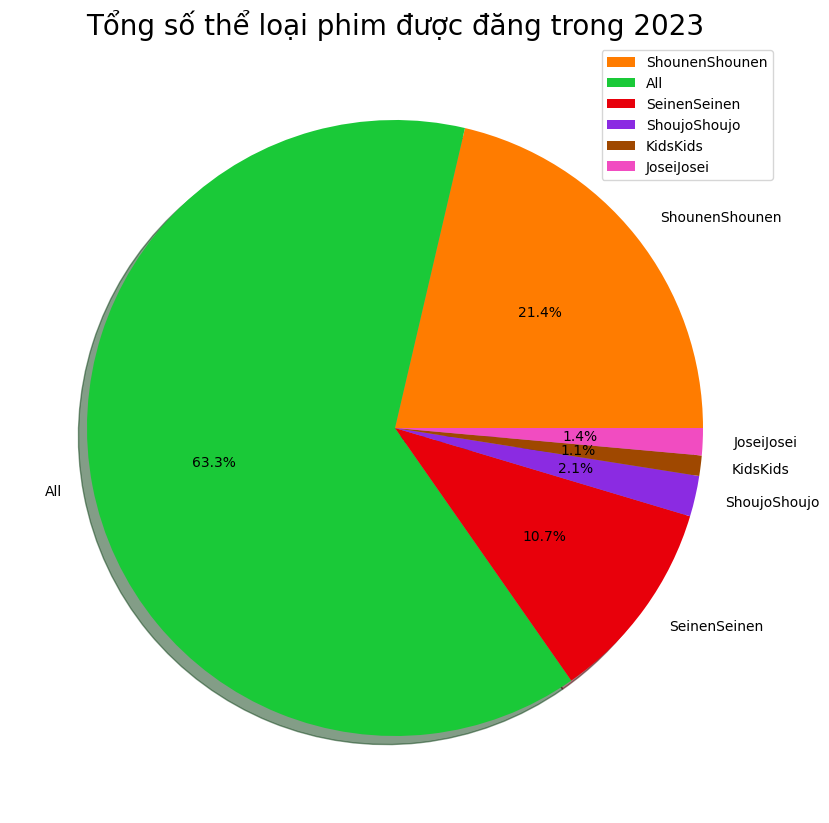

In [24]:
#! đếm xem trong năm 2023 có ? thể loại các phim kia public
df_year_2023 = df[df['Aired'].str.contains('2023')]
dict_the_loai_count = defaultdict(int)
for i in df_year_2023['Demographic']:
    if i in dict_the_loai_count:
        dict_the_loai_count[i] += 1
    else:
        dict_the_loai_count[i] = 1
dict_the_loai_count

#! plot ra bieu do tron:
colors = sns.color_palette('bright')[1:10]
plt.figure(figsize=(20,10))
plt.title("Tổng số thể loại phim được đăng trong 2023",size=20)

plt.pie(x=dict_the_loai_count.values(),labels=dict_the_loai_count.keys(), 
        colors = colors, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10})
plt.legend()
plt.show()

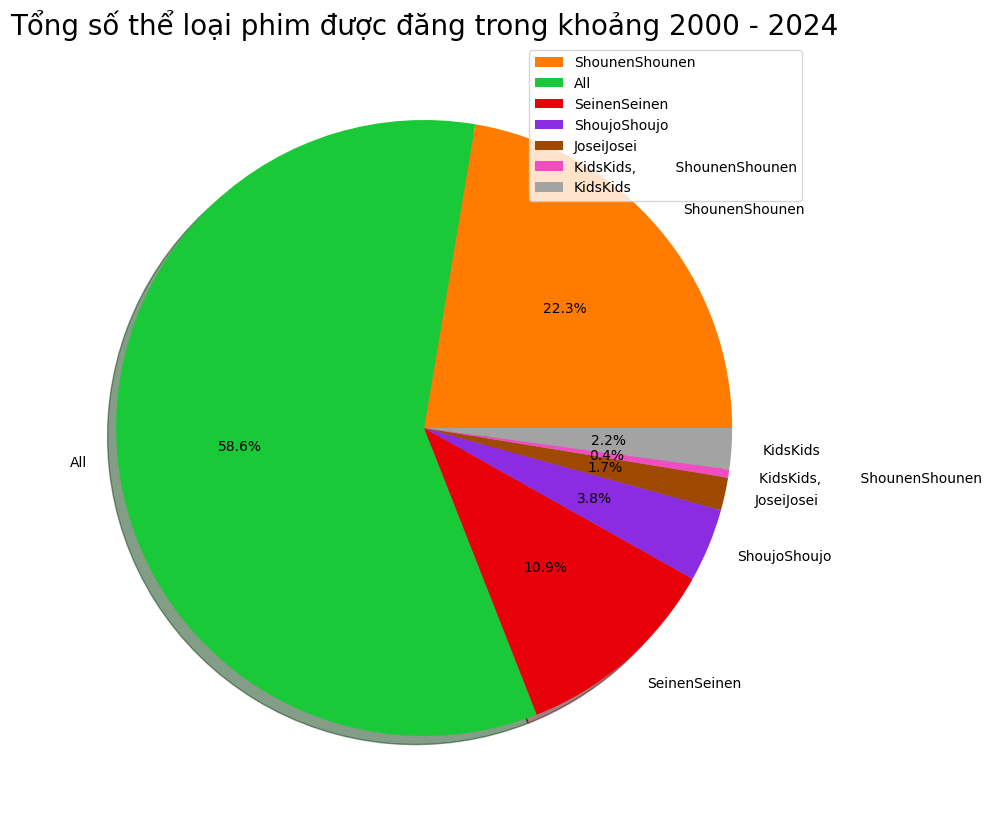

In [25]:
#! tìm xem mỗi studio ra bao nhiêu phim trong các năm từ 2000 - 2024 và năm 2023 nói riêng?

dict_the_loai_count = defaultdict(int)
for i in df['Demographic']:
    if i in dict_the_loai_count:
        dict_the_loai_count[i] += 1
    else:
        dict_the_loai_count[i] = 1
dict_the_loai_count

#! plot ra bieu do tron:
colors = sns.color_palette('bright')[1:10]
plt.figure(figsize=(20,10))
plt.title("Tổng số thể loại phim được đăng trong khoảng 2000 - 2024",size=20)

plt.pie(x=dict_the_loai_count.values(),labels=dict_the_loai_count.keys(), 
        colors = colors, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10})
plt.legend()
plt.show()

In [ ]:
#! Tổng số phim 1 hãng studio sản xuất từ 2000 - 2024
dict_studio_count = defaultdict(int)
#! vì 1 studio có thể hợp tác với nhiều studio khác nên phải check theo: 
for i in df['Studios']:
    if i in dict_the_loai_count:
        dict_studio_count[i] += 1
    else:
        dict_studio_count[i] = 1

for i in range(len(df['Studios'])):
    for j in range(i+1,len(df['Studios'])):
        if df['Studios'][i] in df['Studios'][j]:
            print("hello")
    
#dict_studio_count.values() == 2